In [2]:
# 데이터 전처리

In [ ]:
# Numpy로 데이터 준비하기

In [5]:
# List 형태

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
import numpy as np

In [ ]:
# Numpy로 묶어주기

In [11]:
fish_data = np.column_stack((fish_length, fish_weight))

# print(fish_data)

In [13]:
# 35개의 (1) 도미, 14개의 (0) 방어
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [14]:
# 훈련 세트와 테스트 세트를 적절하게 섞어서 생성해주는 함수

from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [27]:
# 학습 데이터

print(test_target)

[1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.]


In [31]:
# test data - 방어를 20%에 맞게 섞어서 생성
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

In [32]:
print(test_target)

[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.]


In [36]:
# 학습

from sklearn.neighbors import KNeighborsClassifier

In [37]:
kn = KNeighborsClassifier()

In [38]:
# 훈련 fit

# 지도학습 - 답(target) 필수로 필요
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [40]:
# 정확도 확인 - 테스트 세트

kn.score(test_input, test_target)

1.0

In [44]:
# 도미 - 길이 25cm, 무게 150g

kn.predict([[25, 150]])
# 0 - 결과는 방어, 왜? -> 시각적으로 확인해보기

array([0.])

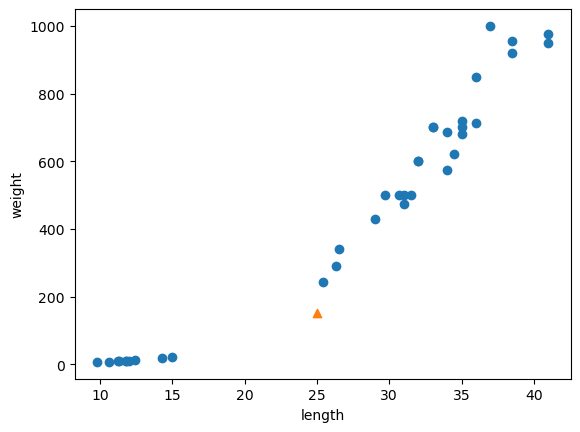

In [45]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [46]:
# 그래프상 도미가 더 가까운 것 같은데 왜 방어로 인식했을까?

# 크기는 10~40인데 무게는 0~1000로
# 데이터의 격차가 커서 무게에 편향되어있음
# 즉 무게에 비해 너비가 무시되고 있는 상태

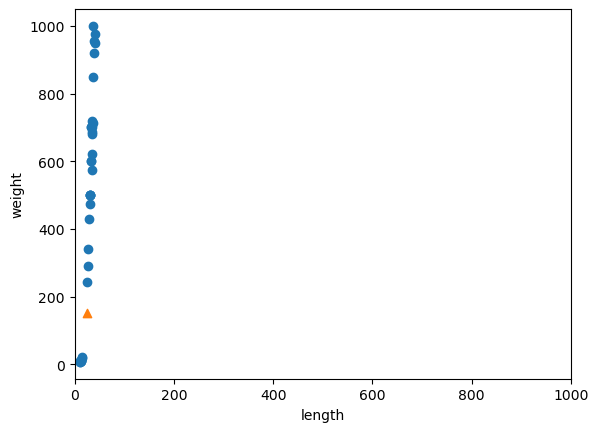

In [47]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker = '^')

# x축 수치 변경
plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [49]:
# 측정 수치 [25, 150] 최근접 이웃 5개 위치 확인 - kneighbors()
distances, indexes = kn.kneighbors([[25, 150]])

In [52]:
train_target[indexes]

# 최근접 이웃 5개중 3개가 방어라서 방어로 판별된듯 함

array([[1., 0., 0., 0., 1.]])

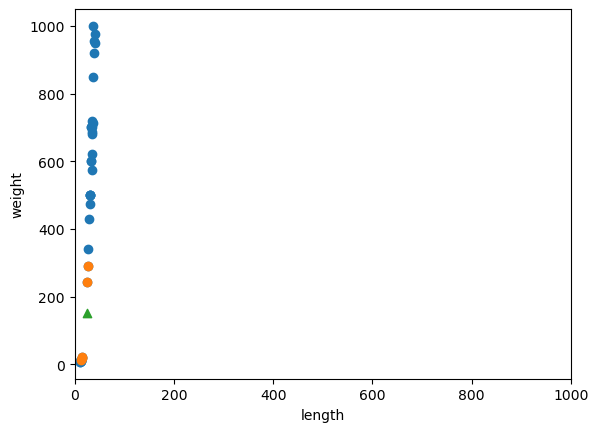

In [54]:
plt.scatter(train_input[:, 0], train_input[:, 1])

# 근접한 이웃
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])

plt.scatter(25, 150, marker = '^')

# x축 수치 변경
plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [61]:
# 평균 구하기

In [62]:
# axis = 0 -> 행 기준
mean = np.mean(train_input, axis = 0)

print(mean)
# 평균 (길이, 무게)

[ 27.41111111 467.66388889]


In [65]:
# 표준 편차 구하기

In [64]:
# axis = 0 -> 행 기준
std = np.std(train_input, axis = 0)

print(std)

[ 10.17575489 333.15269535]


In [60]:
# 표준 점수로 훈련 세트 전처리

In [70]:
train_scaled = (train_input - mean) / std

print(train_scaled)

# -1.5 ~ 1.5 로 통일성있게 변경

[[ 0.69664501  0.45725613]
 [ 0.74578142  0.69738626]
 [ 0.35269019  0.02202027]
 [ 0.5492358   0.69738626]
 [ 1.08973624  1.35774411]
 [ 0.22493554  0.09706093]
 [ 0.32320834  0.09706093]
 [ 0.74578142  0.75741879]
 [-1.58328412 -1.37763823]
 [-1.51449315 -1.37433644]
 [ 0.94232703  1.59787424]
 [-0.10919201 -0.53328066]
 [-1.2884657  -1.34462034]
 [ 0.15614457 -0.11305293]
 [ 0.45096299  0.39722359]
 [ 0.64750861  0.32218293]
 [ 1.08973624  1.46280105]
 [ 1.33541826  1.44779291]
 [-1.73069333 -1.38364148]
 [ 0.45096299  0.39722359]
 [ 0.35269019  0.09706093]
 [-1.65207508 -1.38274099]
 [-1.21967473 -1.34402001]
 [-0.08953745 -0.38319933]
 [-1.53414771 -1.37373611]
 [ 0.64750861  0.65236186]
 [ 0.5492358   0.69738626]
 [ 0.84405422  1.14763025]
 [ 1.33541826  1.52283358]
 [-1.5931114  -1.37433644]
 [ 0.40182659  0.09706093]
 [-1.47518403 -1.36353058]
 [-1.53414771 -1.37403628]
 [ 0.84405422  0.73940903]
 [-0.19763753 -0.67735874]
 [ 0.74578142  0.63735372]]


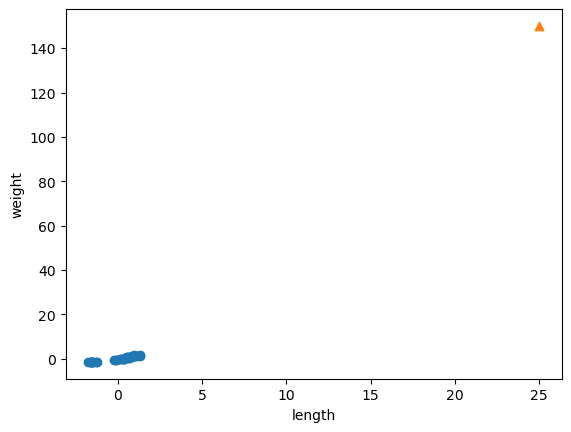

In [74]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

plt.scatter(25, 150, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

# 테스트 데이터도 표준 점수로 변경해줘야함

In [75]:
new = (np.array([25, 150]) - mean) / std

print(new)

[-0.23694666 -0.95350839]


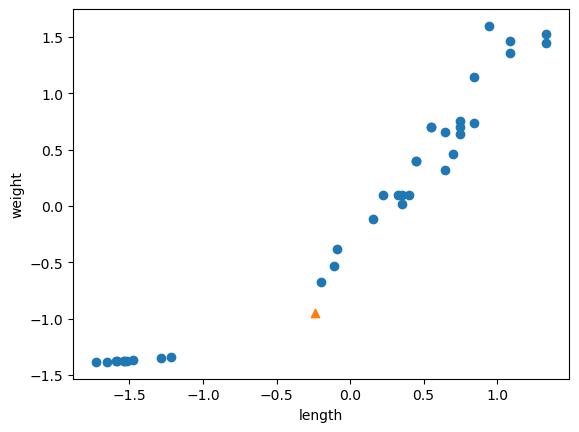

In [77]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

plt.scatter(new[0], new[1], marker = '^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [92]:
test_scaled = (test_input - mean) / std

In [93]:
kn.fit(train_scaled, train_target)

kn.score(test_scaled, test_target)

1.0

In [94]:
kn.predict([new])

# 이제 올바른 답인 1(도미)로 인식하는 모습

array([1.])

In [121]:
distances, indexes = kn.kneighbors([new])

print(indexes)

[[34 11 23 13 22]]


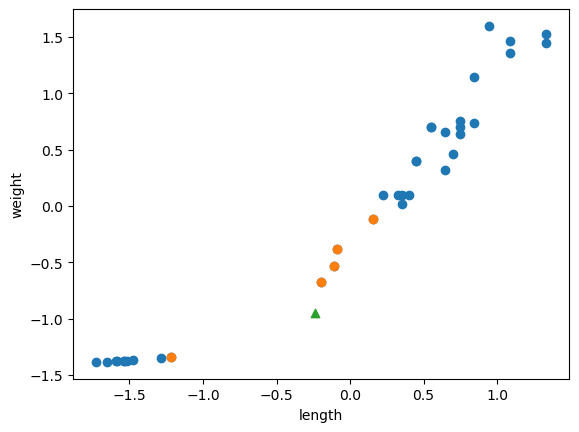

In [97]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])

plt.scatter(new[0], new[1], marker = '^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [104]:
# sklearn에서 제공하는 표준 점수 구하는 기능

In [103]:
# 전처리 모듈
from sklearn.preprocessing import StandardScaler

In [107]:
# fit, transform = 표준 점수 변환
ss = StandardScaler()

In [109]:
# 훈련
ss.fit(fish_data)

StandardScaler()

In [114]:
# 표준 점수로 변경
train_scaled = ss.transform(train_input)

test_scaled = ss.transform(test_input)

In [115]:
# 표준 점수로 훌련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [116]:
kn.score(test_scaled, test_target)

1.0

In [117]:
kn.predict([new])

array([1.])